<a href="https://colab.research.google.com/github/khoadangtruong/Sales-Analysis/blob/master/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import datetime as dt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = '/content/drive/MyDrive/data/all_data.csv'

df = pd.read_csv(data_path)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
df.shape

(372444, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372444 entries, 0 to 372443
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          371900 non-null  float64
 1   Product           371900 non-null  object 
 2   Quantity Ordered  371900 non-null  float64
 3   Price Each        371900 non-null  float64
 4   Order Date        371900 non-null  object 
 5   Purchase Address  371900 non-null  object 
dtypes: float64(3), object(3)
memory usage: 17.0+ MB


In [ ]:
df.describe()

,Order ID,Quantity Ordered,Price Each
count,371900.000000,371900.000000,371900.000000
mean,230417.569379,1.124383,184.399735
std,51512.667854,0.442792,332.730883
min,141234.000000,1.000000,2.990000
25%,185831.000000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275036.000000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [ ]:
df.dropna(inplace = True)

In [ ]:
df['Order ID'] = df['Order ID'].astype('int64')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 372443
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  int64         
 1   Product           371900 non-null  object        
 2   Quantity Ordered  371900 non-null  int64         
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  371900 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 19.9+ MB


In [ ]:
df['Total'] = df['Price Each'] * df['Quantity Ordered']
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour

In [ ]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ', ' + x.split(',')[2].split(' ')[1])

In [ ]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,Hour,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,8,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,22,"Boston, MA"


# 1. What city had the most sales ?

In [ ]:
city_revenue = pd.DataFrame(df.groupby('City')['Total'].sum())
city_revenue.sort_values('Total', inplace = True, ascending = False)
city_revenue

,Total
City,
"San Francisco, CA",16524407.82
"Los Angeles, CA",10905141.60
"New York City, NY",9328634.86
"Boston, MA",7323284.02
"Atlanta, GA",5590997.16
"Dallas, TX",5535950.80
"Seattle, WA",5495510.96
"Portland, OR",3741464.68
"Austin, TX",3639163.50


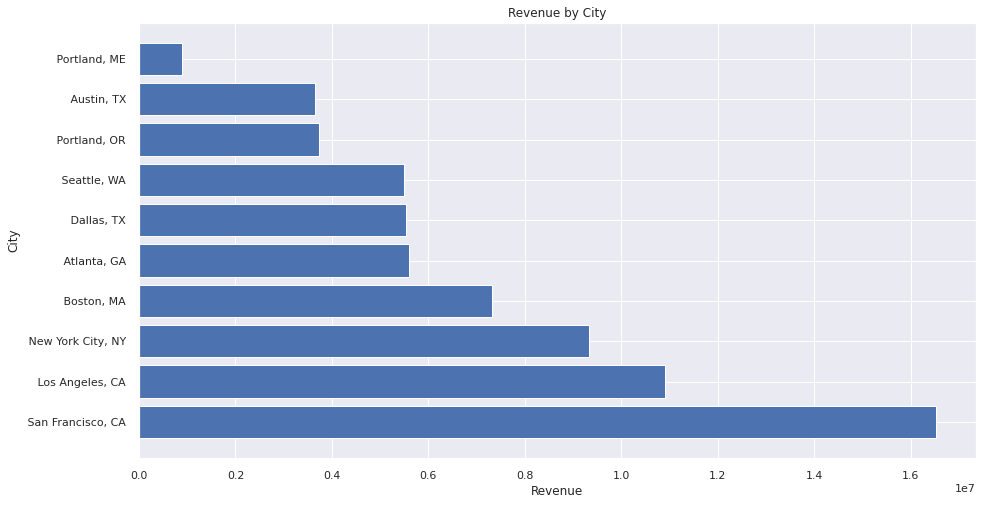

In [ ]:
sns.set_theme()

fig = plt.figure(figsize = (15, 8))
plt.barh(width = city_revenue['Total'], y = city_revenue.index)
plt.title('Revenue by City')
plt.xlabel('Revenue')
plt.ylabel('City')

plt.show()

# 2. What was the best month for sales ?

In [ ]:
month_revenue = pd.DataFrame(df.groupby('Month')['Total'].sum())
month_revenue

,Total
Month,
1,3644513.46
2,4404044.84
3,5614200.76
4,6781340.48
5,6305213.50
6,5155604.52
7,5295551.52
8,4488935.76
9,4195120.26


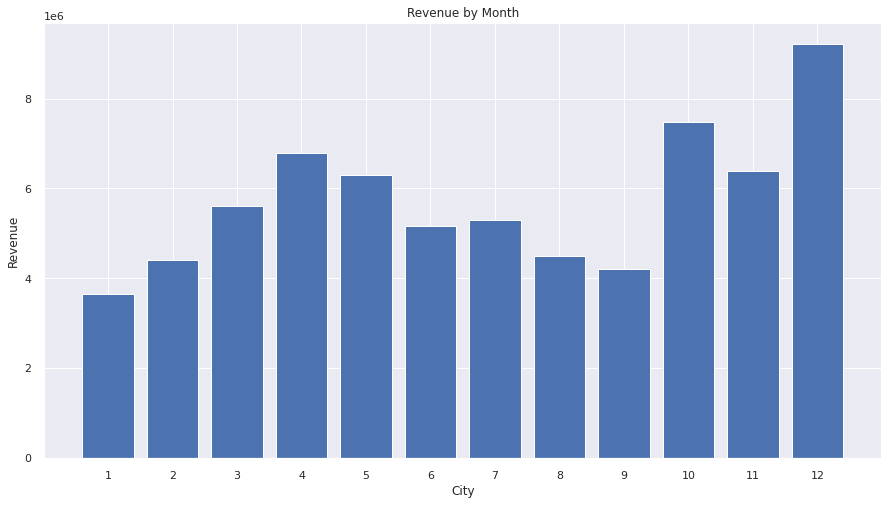

In [ ]:
fig = plt.figure(figsize = (15, 8))

plt.bar(x = month_revenue.index, height = month_revenue['Total'])
plt.title('Revenue by Month')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(month_revenue.index)

plt.show()

# 3. What time should we display advertisements ?

In [ ]:
hour_revenue = pd.DataFrame(df.groupby('Hour')['Total'].sum())
hour_revenue

,Total
Hour,
0,1427442.54
1,921733.76
2,469702.88
3,291515.78
4,325322.02
5,461359.64
6,896226.00
7,1489708.24
8,2384697.94


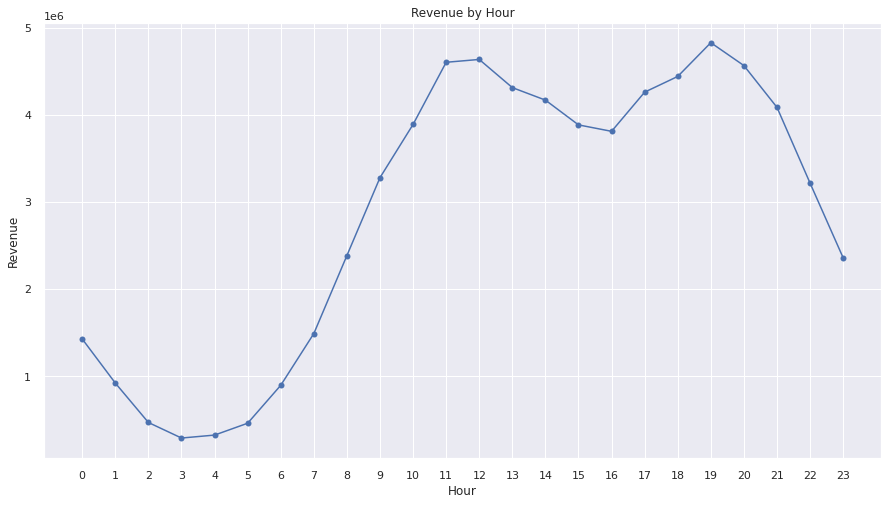

In [ ]:
fig = plt.figure(figsize = (15, 8))

plt.plot(hour_revenue, marker = 'o')
plt.title('Revenue by Hour')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.xticks(hour_revenue.index)

plt.show()

# 4. What product had the most sales ?

In [ ]:
product_revenue = pd.DataFrame(df.groupby('Product')['Total'].sum())
product_revenue.sort_values('Total', inplace = True)
product_revenue.head()

,Total
Product,
AAA Batteries (4-pack),185481.66
AA Batteries (4-pack),212236.80
Wired Headphones,492956.86
USB-C Charging Cable,573002.50
Lightning Charging Cable,694188.30


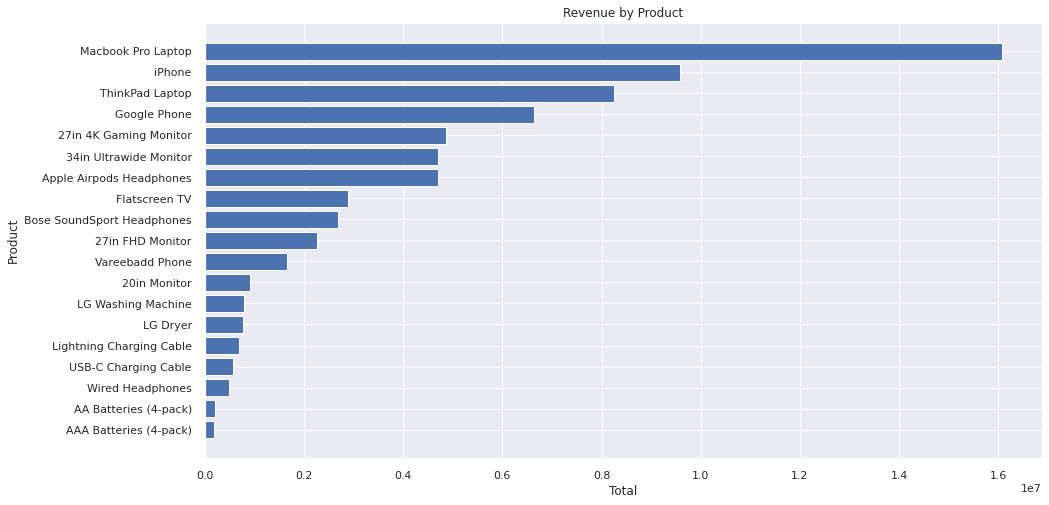

In [ ]:
fig = plt.figure(figsize = (15, 8))

plt.barh(y = product_revenue.index, width = product_revenue['Total'])
plt.title('Revenue by Product')
plt.xlabel('Total')
plt.ylabel('Product')

plt.show()

# 5. What product sold the most ?

In [ ]:
product_sold = pd.DataFrame(df.groupby('Product')['Quantity Ordered'].sum())
product_sold.rename(columns = {'Quantity Ordered': 'Total'}, inplace = True)
product_sold.sort_values('Total', inplace = True)
product_sold.index.name = None
product_sold.head()

,Total
LG Dryer,1292
LG Washing Machine,1332
Vareebadd Phone,4136
20in Monitor,8258
ThinkPad Laptop,8260


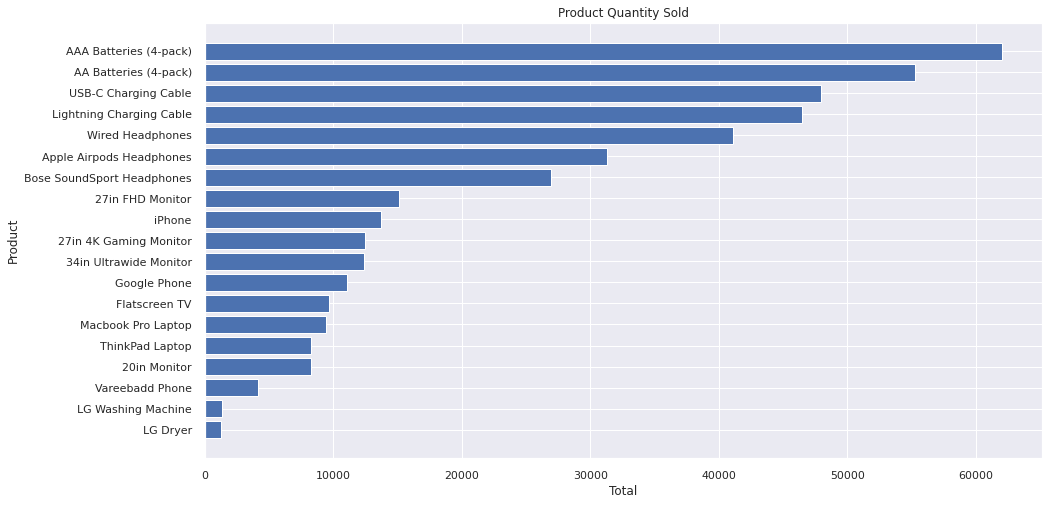

In [ ]:
fig = plt.figure(figsize = (15, 8))

plt.barh(y = product_sold.index, width = product_sold['Total'])
plt.title('Product Quantity Sold')
plt.xlabel('Total')
plt.ylabel('Product')

plt.show()